# California Housing Price Predictor
---
### Name: Devraj Deshmukh
### Roll_no: 21102B0047
---


1.	**Data Loading and Splitting**: The dataset is loaded and split into training and testing sets to ensure a clean separation of data for model evaluation.

2.	**Exploratory Data Analysis (EDA)**: EDA is performed on the training set to understand the data distribution and relationships between features.

3.	**Data Preprocessing**: Key preprocessing steps include handling skewed features through logarithmic transformations and encoding categorical variables.

4.	**Feature Engineering**: New features are created to enhance the model’s predictive power.
	
5.	**Model Training and Evaluation**: Two models are trained and evaluated - a Linear Regression model.

## Import Libaries
---

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [84]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

## Data: First Look
---

In [85]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [87]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [88]:
data.dropna(inplace=True)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [90]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11118,-117.87,33.84,17.0,2395.0,410.0,1224.0,399.0,5.1182,<1H OCEAN,249200.0
16670,-120.52,35.24,5.0,4413.0,804.0,2003.0,725.0,5.0267,<1H OCEAN,253300.0
2765,-115.90,32.69,18.0,414.0,86.0,98.0,54.0,1.5417,INLAND,57500.0
8751,-118.37,33.82,36.0,2416.0,394.0,1115.0,386.0,6.2560,<1H OCEAN,366900.0
3674,-118.39,34.22,35.0,1790.0,334.0,1277.0,345.0,5.0818,<1H OCEAN,186800.0
...,...,...,...,...,...,...,...,...,...,...
14730,-117.01,32.81,26.0,4499.0,645.0,1866.0,626.0,5.5160,<1H OCEAN,185100.0
9860,-121.86,36.60,21.0,3634.0,1011.0,1985.0,917.0,2.9085,<1H OCEAN,156300.0
4856,-118.31,34.02,46.0,1976.0,469.0,1409.0,431.0,2.2981,<1H OCEAN,112100.0
11374,-117.96,33.68,25.0,2004.0,349.0,1085.0,343.0,4.7656,<1H OCEAN,230700.0


## Exploratory Data Analysis (EDA)

### Visualizing Data Distribution


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

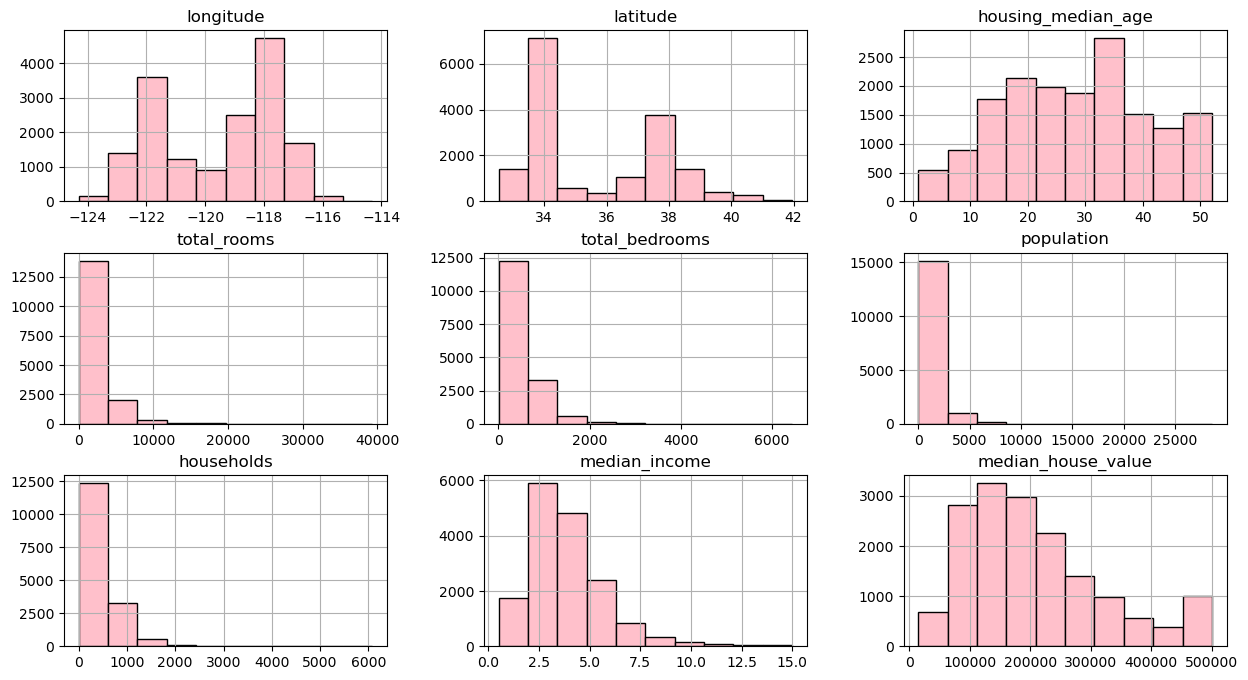

In [91]:
train_data.hist(figsize=(15,8),color = "pink",edgecolor = "black")

### Correlation Matrix

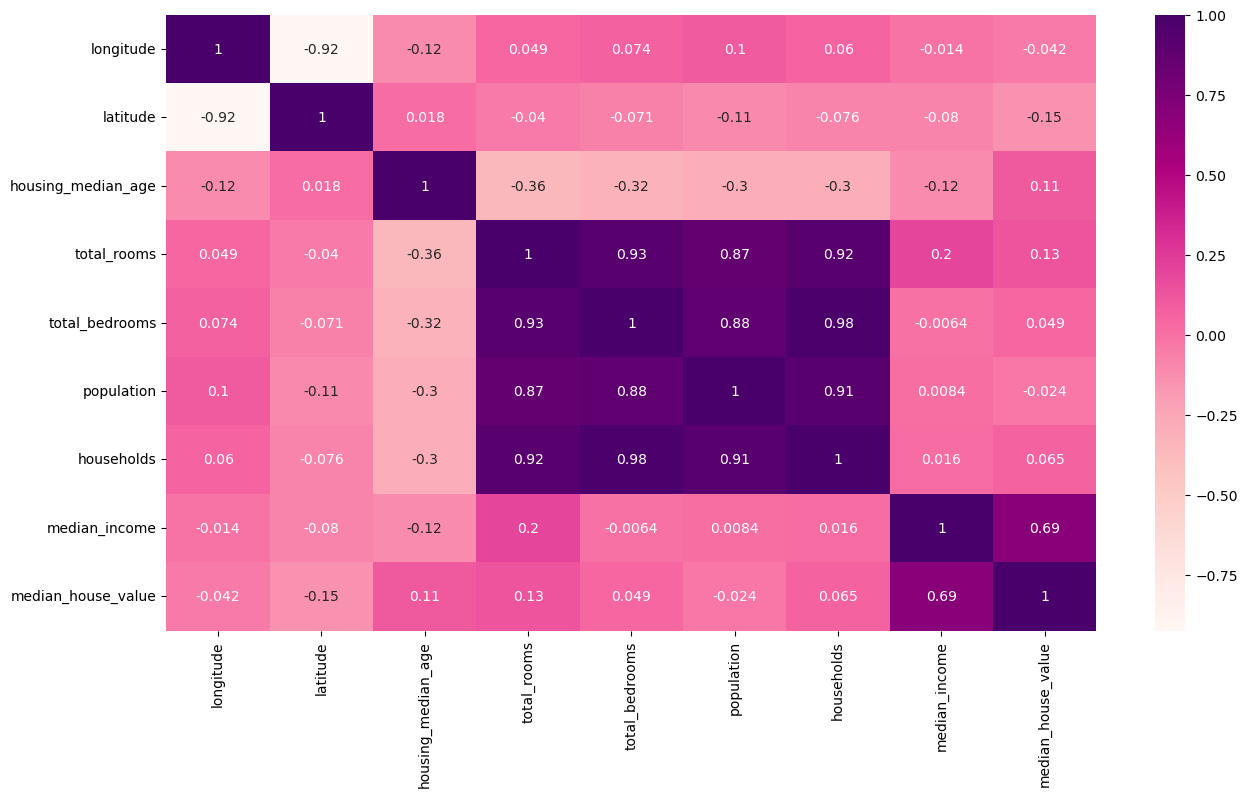

In [92]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="RdPu")
plt.show()

## Data Preprocessing

In [93]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

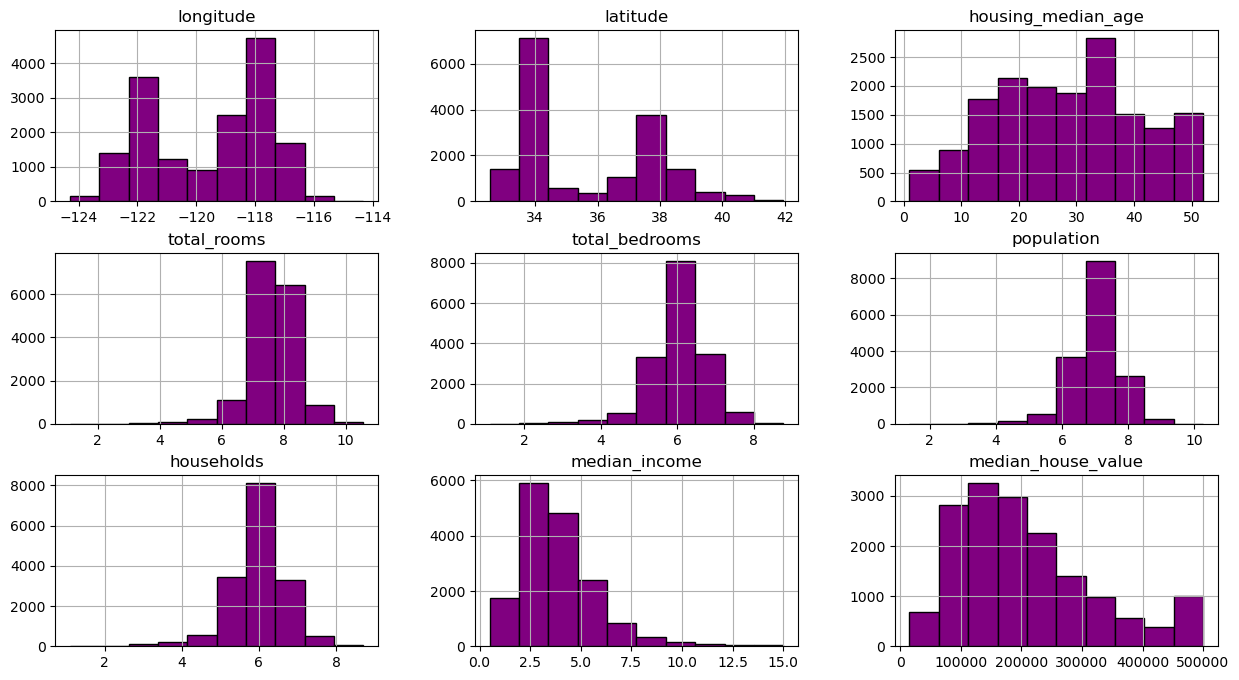

In [94]:
train_data.hist(figsize=(15,8) ,color = "purple", edgecolor = "black")
plt.show()

### Encoding Categorical Features

In [95]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7238
INLAND        5177
NEAR OCEAN    2092
NEAR BAY      1835
ISLAND           4
Name: ocean_proximity, dtype: int64

In [96]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [97]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11118,-117.87,33.84,17.0,7.781556,6.018593,7.110696,5.991465,5.1182,249200.0,1,0,0,0,0
16670,-120.52,35.24,5.0,8.392537,6.690842,7.602900,6.587550,5.0267,253300.0,1,0,0,0,0
2765,-115.90,32.69,18.0,6.028279,4.465908,4.595120,4.007333,1.5417,57500.0,0,1,0,0,0
8751,-118.37,33.82,36.0,7.790282,5.978886,7.017506,5.958425,6.2560,366900.0,1,0,0,0,0
3674,-118.39,34.22,35.0,7.490529,5.814131,7.153052,5.846439,5.0818,186800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,-117.01,32.81,26.0,8.411833,6.470800,7.532088,6.440947,5.5160,185100.0,1,0,0,0,0
9860,-121.86,36.60,21.0,8.198364,6.919684,7.593878,6.822197,2.9085,156300.0,1,0,0,0,0
4856,-118.31,34.02,46.0,7.589336,6.152733,7.251345,6.068426,2.2981,112100.0,1,0,0,0,0
11374,-117.96,33.68,25.0,7.603399,5.857933,6.990257,5.840642,4.7656,230700.0,1,0,0,0,0


### Updated Correlation Matrix

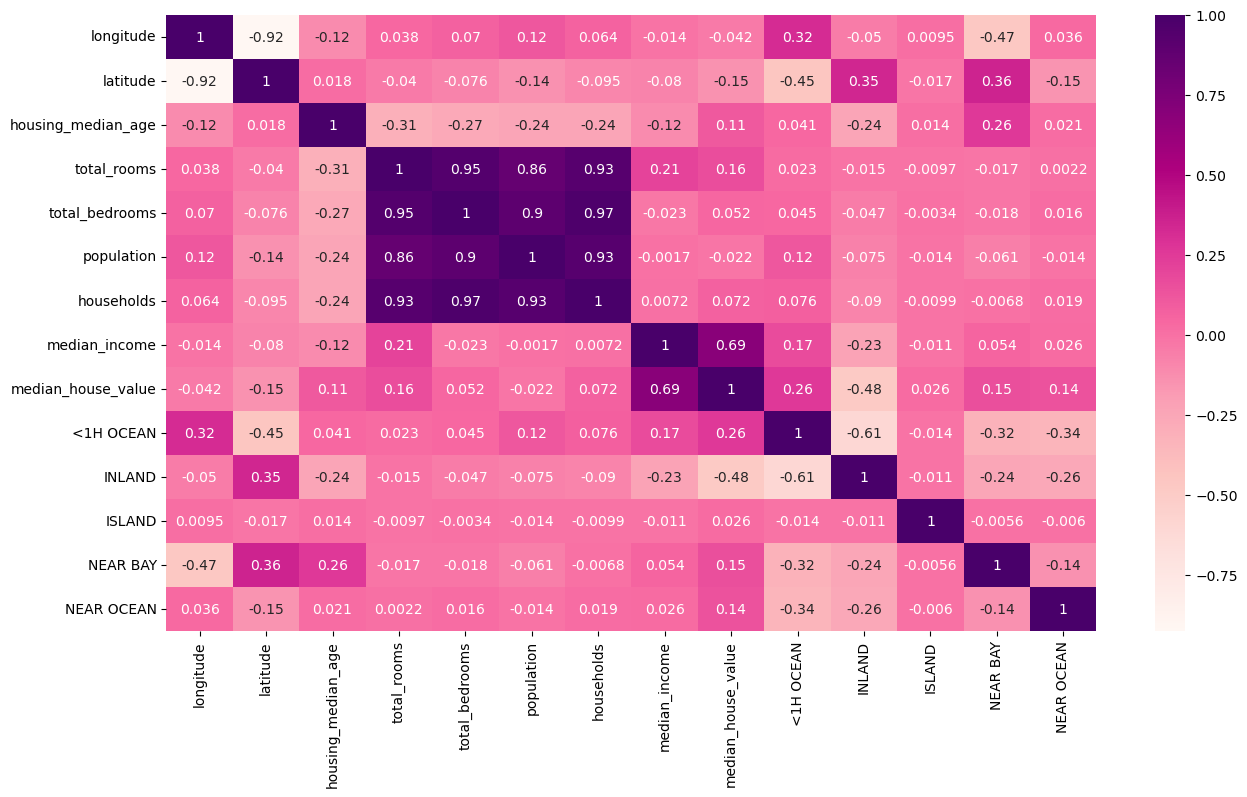

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

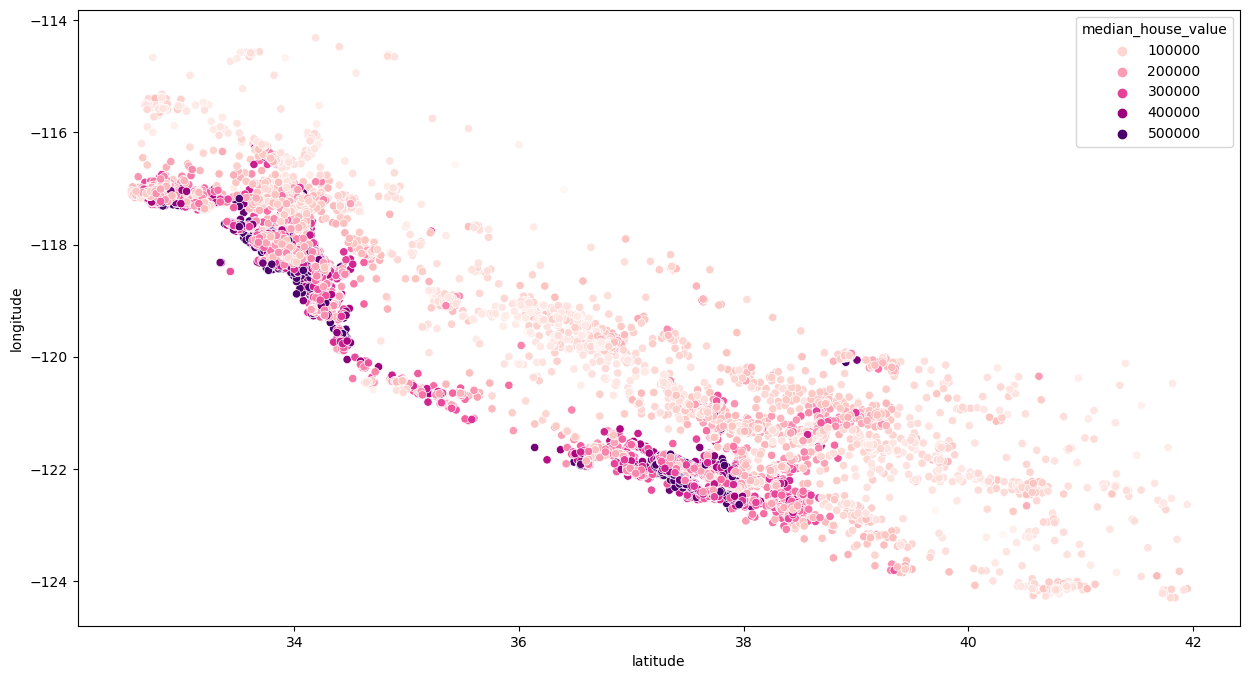

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='RdPu')

## Feature Engineering
household_rooms and bedroom_ratio

In [100]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

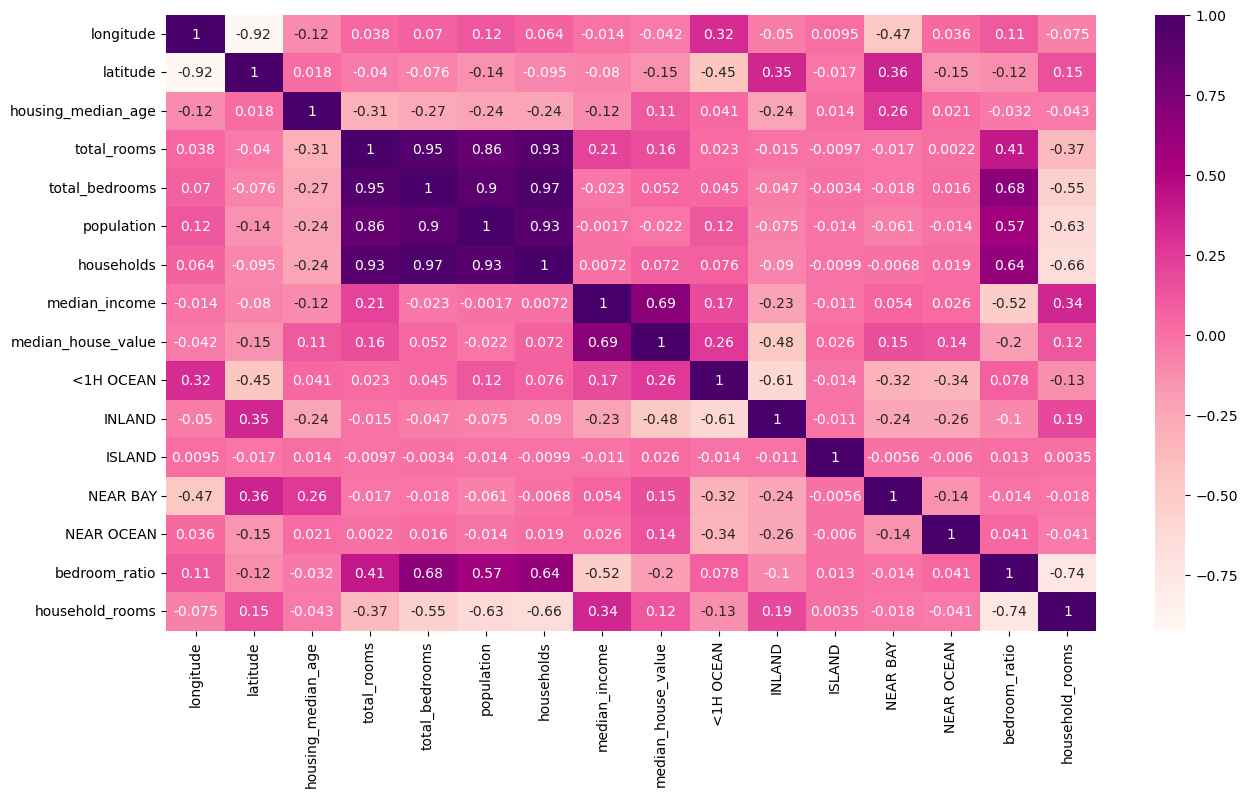

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

## Model: Linear Regression

### Scaling the Features
- StandardScaler.

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model

In [103]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data

In [104]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression

In [105]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6611074613030244

In [106]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### UI created using Bokeh for prediction in the same directory with name app.py

## Conclusion
--- 

1.	**Data Preprocessing**:
	-	Essential for normalizing skewed distributions and encoding categorical variables.
	-	Improved the suitability of the data for linear models.

2.	**Feature Engineering**:
	-	Creating new features like bedroom_ratio and household_rooms added valuable information, enhancing model performance.

3.	**Model Evaluation**:
	-	Splitting data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
	-	Linear Regression provided a baseline.

4.	**Exploratory Data Analysis (EDA)**:
	-	Guided feature selection and engineering through understanding feature-target relationships.
	-	Data visualization revealed underlying data patterns.
	
5.	**Model Performance**:
	-	Linear Regression was simple but limited.